# Clustering Experiments with BERT Features

This notebook clusters articles using the combined dataset with BERT embeddings and article metadata.


In [1]:
# Ensure project root is the working directory so relative paths resolve
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
print('CWD:', os.getcwd())


CWD: c:\Users\tom\coding_projects\data_analytics_projects\h_and_m_data_analysis


In [2]:
import polars as pl
from hnm_data_analysis.clustering.article_clustering import ArticleClusterer, ClusteringConfig
from hnm_data_analysis.data_understanding.data_report_generator import generate_data_report

# Paths
features_parquet = 'data/features/bert/pca_embeddings.parquet'
articles_metadata = 'data/cleaned/articles_last_3_months_cleaned.parquet'

# Load features from parquet (expects 'article_id' and numeric feature columns)
clusterer = ArticleClusterer(features_path=features_parquet,
                             articles_metadata_path=articles_metadata)
features, article_ids = clusterer.load_features()
clusterer.load_articles_metadata()


Loaded features: 42,229 articles x 50 features
Loaded articles metadata: 42,298 articles


article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,product_type_no_negative_fixed,graphical_appearance_no_negative_fixed,product_code_invalid
i64,i64,str,i64,cat,cat,i64,cat,i64,cat,i64,cat,i64,cat,i64,cat,str,cat,i64,cat,i64,cat,i64,cat,cat,bool,bool,bool
816591001,816591,"""Dingo tee TVP""",255,"""T-shirt""","""Garment Upper body""",1010017,"""Stripe""",73,"""Dark Blue""",4,"""Dark""",2,"""Blue""",1640,"""Tops Fancy Jersey""","""D""","""Divided""",2,"""Divided""",53,"""Divided Collection""",1005,"""Jersey Fancy""","""T-shirt in soft cotton jersey …",false,false,false
804472003,804472,"""Michael HT SB""",94,"""Sneakers""","""Shoes""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",4211,"""Kids Boy Shoes""","""J""","""Children Accessories, Swimwear""",4,"""Baby/Children""",42,"""Kids & Baby Shoes""",1020,"""Shoes""","""Hi-tops in patterned imitation…",false,false,false
693915001,693915,"""Brazil Trousers""",272,"""Trousers""","""Garment Lower body""",1010004,"""Check""",13,"""Beige""",2,"""Medium Dusty""",11,"""Beige""",1948,"""Trousers & Skirt""","""A""","""Ladieswear""",1,"""Ladieswear""",18,"""Womens Trend""",1009,"""Trousers""","""Trousers in woven fabric with …",false,false,false
790904007,790904,"""Billy Cargo Pant""",272,"""Trousers""","""Garment Lower body""",1010016,"""Solid""",13,"""Beige""",2,"""Medium Dusty""",11,"""Beige""",5656,"""Trouser""","""F""","""Menswear""",3,"""Menswear""",21,"""Contemporary Casual""",1009,"""Trousers""","""Trousers in a cotton weave wit…",false,false,false
829618001,829618,"""Coachella Push Melbourne""",306,"""Bra""","""Underwear""",1010016,"""Solid""",10,"""White""",3,"""Light""",9,"""White""",1338,"""Expressive Lingerie""","""B""","""Lingeries/Tights""",1,"""Ladieswear""",61,"""Womens Lingerie""",1017,"""Under-, Nightwear""","""Push-up bra in lace with under…",false,false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
699424001,699424,"""Ring Ring Brief""",59,"""Swimwear bottom""","""Swimwear""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",4242,"""Swimwear""","""B""","""Lingeries/Tights""",1,"""Ladieswear""",60,"""Womens Swimwear, beachwear""",1018,"""Swimwear""","""Fully lined bikini bottoms wit…",false,false,false
842056002,842056,"""FUNC. SB Mountain waterpr pant""",276,"""Outdoor trousers""","""Garment Lower body""",1010016,"""Solid""",9,"""Black""",4,"""Dark""",5,"""Black""",7852,"""Kids Boy Outdoor""","""H""","""Children Sizes 92-140""",4,"""Baby/Children""",45,"""Kids Outerwear""",1007,"""Outdoor""","""Padded outdoor trousers in win…",false,false,false
870059002,870059,"""Sibling 1 SG L/S T-shirt""",254,"""Top""","""Garment Upper body""",1010001,"""All over pattern""",52,"""Pink""",7,"""Medium""",4,"""Pink""",7616,"""Kids Girl Jersey Fancy""","""H""","""Children Sizes 92-140""",4,"""Baby/Children""",76,"""Kids Girl""",1005,"""Jersey Fancy""","""Long-sleeved top in soft cotto…",false,false,false


**Python code changed to Markdown because the optimal k value has been found**

```python
# Find the optimal number of clusters
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define k range
k_min, k_max = 2, 50
k_range = (k_min, k_max)

# Ensure output directory for plots
out_dir = 'results/bert_clustering'
os.makedirs(out_dir, exist_ok=True)

# 1) Elbow (KMeans inertia)
opt_k_elbow, scores_elbow = clusterer.find_optimal_k(k_range=k_range, algorithm='kmeans', method='elbow')
clusterer.plot_k_selection(scores_elbow, method='elbow', optimal_k=opt_k_elbow,
                           save_path=os.path.join(out_dir, f'optimal_k_elbow_{k_min}_{k_max}.png'))

# 2) Silhouette
opt_k_sil, scores_sil = clusterer.find_optimal_k(k_range=k_range, algorithm='kmeans', method='silhouette')
clusterer.plot_k_selection(scores_sil, method='silhouette', optimal_k=opt_k_sil,
                           save_path=os.path.join(out_dir, f'optimal_k_silhouette_{k_min}_{k_max}.png'))

# 3) Calinski–Harabasz (higher is better) and 4) Davies–Bouldin (lower is better)
scores_ch = {}
scores_db = {}
for k in range(k_min, k_max + 1):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(clusterer.features)
    # Only compute when >=2 clusters exist
    if len(set(labels)) > 1:
        scores_ch[k] = calinski_harabasz_score(clusterer.features, labels)
        scores_db[k] = davies_bouldin_score(clusterer.features, labels)

# Plot CH and DB using the clusterer's plot helper
best_k_ch = max(scores_ch, key=scores_ch.get)
best_k_db = min(scores_db, key=scores_db.get)
clusterer.plot_k_selection(scores_ch, method='calinski-harabasz', optimal_k=best_k_ch,
                           save_path=os.path.join(out_dir, f'optimal_k_calinski_harabasz_{k_min}_{k_max}.png'))
clusterer.plot_k_selection(scores_db, method='davies-bouldin', optimal_k=best_k_db,
                           save_path=os.path.join(out_dir, f'optimal_k_davies_bouldin_{k_min}_{k_max}.png'))

# Simple recommendation strategy: prefer silhouette's optimum; show others for context
recommended_k = int(opt_k_sil)
print(f"Recommendation → k={recommended_k} (silhouette).  Elbow≈{opt_k_elbow}, CH={best_k_ch}, DB={best_k_db}")
```


In [3]:
# Cluster with the selected k
try:
    k_to_use = int(recommended_k)
except Exception:
    k_to_use = 32
print(f"Clustering with k={k_to_use}")
config = ClusteringConfig(algorithm='kmeans', n_clusters=k_to_use)
results = clusterer.cluster(config)
results.n_clusters, results.silhouette


Clustering with k=32
Performing kmeans clustering...
Clustering completed: 32 clusters
Silhouette Score: 0.2024
Calinski-Harabasz Index: 1926.5615
Davies-Bouldin Index: 1.9326


(32, 0.20241508)

Creating 2D visualization using PCA...
Saved cluster visualization to: ../results/bert_clustering/clusters_pca_10.png


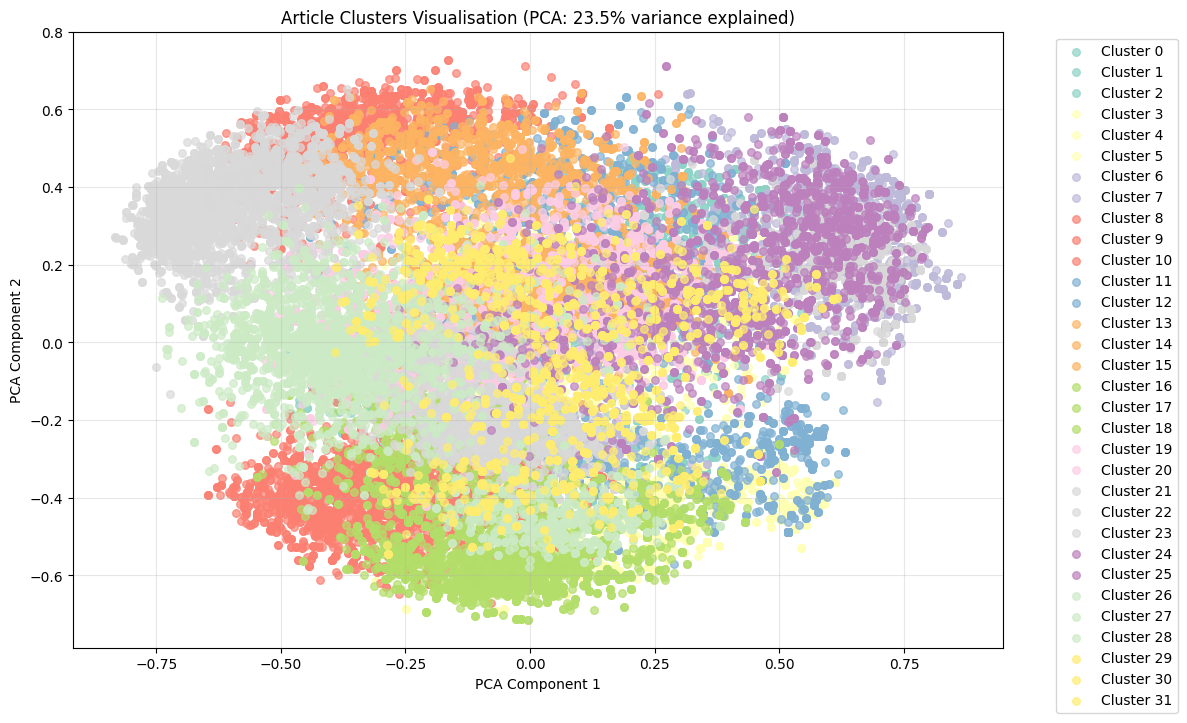

Creating 2D visualization using TSNE...
Saved cluster visualization to: ../results/bert_clustering/clusters_tsne_10.png


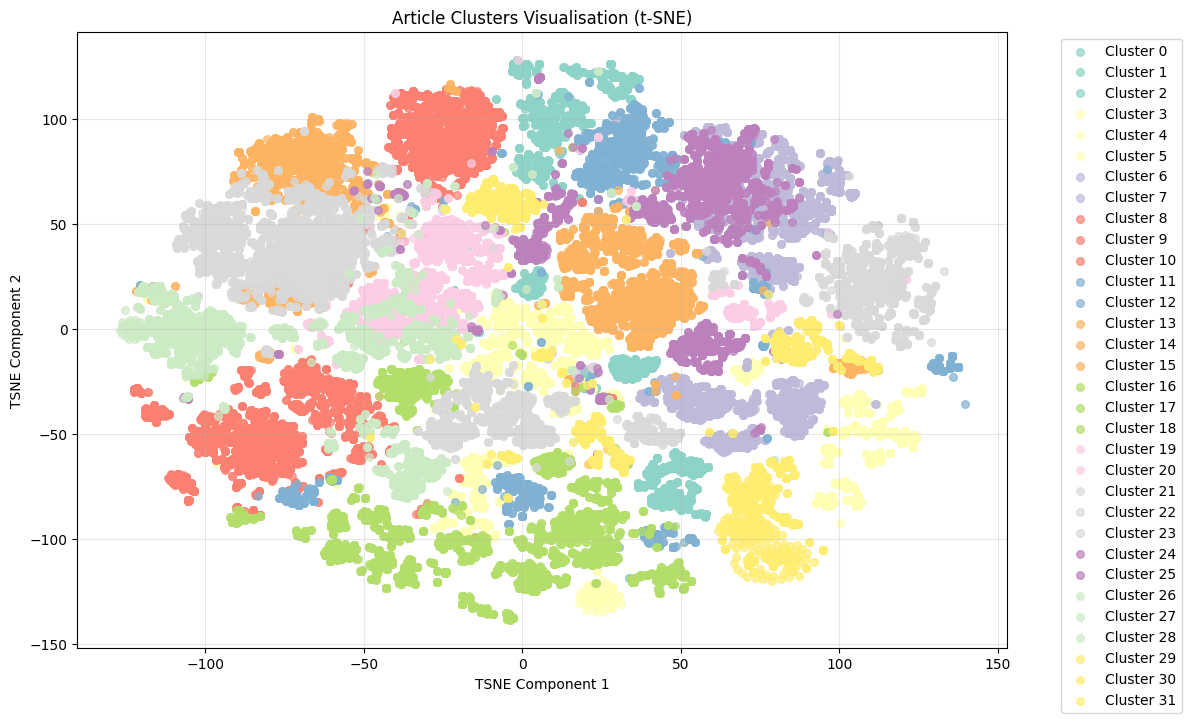

In [4]:
# Visualise clusters (PCA and t-SNE)
clusterer.visualise_clusters(method='pca', save_path='../results/bert_clustering/clusters_pca_10.png')
clusterer.visualise_clusters(method='tsne', save_path='../results/bert_clustering/clusters_tsne_10.png')

### Display 3 samples from 3 sample clusters


In [5]:
# Sample 3 clusters at random and display 3 articles from each
import numpy as np

labels = np.array(results.labels)
unique_clusters = np.array([c for c in set(labels) if c != -1])
num_to_sample = min(3, len(unique_clusters))
sampled_clusters = np.random.choice(unique_clusters, size=num_to_sample, replace=False)

print(f"Sampled clusters: {sampled_clusters}")

# Build a lookup from article_id to row index
article_ids_list = list(results.article_ids) if hasattr(results, 'article_ids') else clusterer.article_ids

# Ensure metadata is loaded
metadata = clusterer.articles_metadata

for cid in sampled_clusters:
    idxs = np.where(labels == cid)[0]
    if len(idxs) == 0:
        continue
    sample_idxs = np.random.choice(idxs, size=min(3, len(idxs)), replace=False)
    sampled_article_ids = [article_ids_list[i] for i in sample_idxs]
    print(f"\nCluster {int(cid)} — {len(idxs)} items; showing {len(sampled_article_ids)} samples")
    if metadata is not None:
        display(
            metadata.filter(pl.col("article_id").is_in(sampled_article_ids))
                   .select([
                       "article_id",
                       "product_group_name",
                       "product_type_name",
                       "department_name",
                       "garment_group_name",
                       "colour_group_name",
                       "graphical_appearance_name",
                       "detail_desc"
                   ])
        )
    else:
        print(sampled_article_ids)


Sampled clusters: [10  4  0]

Cluster 10 — 1293 items; showing 3 samples


article_id,product_group_name,product_type_name,department_name,garment_group_name,colour_group_name,graphical_appearance_name,detail_desc
i64,cat,cat,cat,cat,cat,cat,cat
905867001,"""Shoes""","""Boots""","""Shoes""","""Shoes""","""Dark Beige""","""Solid""","""Chelsea boots with elastic gor…"
888493003,"""Shoes""","""Boots""","""Kids Girl Shoes""","""Shoes""","""Light Pink""","""Solid""","""Lined wellingtons with a loop …"
620754002,"""Shoes""","""Sandals""","""Flats""","""Shoes""","""Beige""","""Solid""","""Satin sandals with narrow stra…"



Cluster 4 — 668 items; showing 3 samples


article_id,product_group_name,product_type_name,department_name,garment_group_name,colour_group_name,graphical_appearance_name,detail_desc
i64,cat,cat,cat,cat,cat,cat,cat
826835001,"""Garment Lower body""","""Trousers""","""Trouser""","""Trousers""","""Off White""","""Denim""","""Ankle-length dungarees in cott…"
792515001,"""Socks & Tights""","""Underwear Tights""","""Tights basic""","""Socks and Tights""","""Black""","""Solid""","""Semi shiny tights with a high …"
881244006,"""Garment Lower body""","""Trousers""","""OL Extended Sizes""","""Trousers Denim""","""Dark Blue""","""Denim""","""Ankle-length jeggings in stret…"



Cluster 0 — 1354 items; showing 3 samples


article_id,product_group_name,product_type_name,department_name,garment_group_name,colour_group_name,graphical_appearance_name,detail_desc
i64,cat,cat,cat,cat,cat,cat,cat
840505010,"""Garment Upper body""","""Hoodie""","""Kids Girl Jersey Basic""","""Jersey Basic""","""Pink""","""Solid""","""Zip-through hoodie in sweatshi…"
874619001,"""Underwear""","""Bra""","""Nightwear""","""Under-, Nightwear""","""Black""","""Front print""","""Long hoodie in sweatshirt fabr…"
521062011,"""Garment Upper body""","""Hoodie""","""Jersey Fancy""","""Jersey Fancy""","""Light Beige""","""Embroidery""","""Top in patterned sweatshirt fa…"


In [6]:
# Save results (labels, model, metrics), then build final dataset keeping all articles
clusterer.save_results('../results/bert_clustering')

# Build final features by left-joining labels onto all cleaned articles
import os
import polars as pl
import numpy as np

cleaned_path = 'data/cleaned/articles_last_3_months_cleaned.parquet'
final_dir = 'data/features/final'
final_path = os.path.join(final_dir, 'articles_features_final.parquet')

# Labels from results
labels_df = pl.DataFrame({
    'article_id': clusterer.article_ids,
    'bert_cluster': np.asarray(results.labels, dtype=int)
})

# Keep all articles; add cluster labels where available (null where missing)
cleaned_df = pl.read_parquet(cleaned_path)
final_df = cleaned_df.join(labels_df, on='article_id', how='left')

# Select only the required columns: article_id, categorical columns, detail_desc, and bert_cluster
categorical_cols = [
    'product_type_name', 'product_group_name', 'graphical_appearance_name', 
    'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name',
    'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name'
]

columns_to_keep = ['article_id'] + categorical_cols + ['detail_desc', 'bert_cluster']
final_df_filtered = final_df.select(columns_to_keep)

os.makedirs(final_dir, exist_ok=True)
final_df_filtered.write_parquet(final_path)
print(f'Saved final features to: {final_path}\nRows: {final_df_filtered.height:,}  Cols: {len(final_df_filtered.columns)}')
print(f'Columns kept: {final_df_filtered.columns}')

Saved cluster labels to: ../results/bert_clustering\cluster_labels.csv
Saved clustering model to: ../results/bert_clustering\clustering_model.joblib
Saved results metadata to: ../results/bert_clustering\clustering_results.json
Saved final features to: data/features/final\articles_features_final.parquet
Rows: 42,298  Cols: 14
Columns kept: ['article_id', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'detail_desc', 'bert_cluster']


In [7]:
# Generate data report for data\features\final\articles_features_final.parquet
print(generate_data_report("data/features/final/articles_features_final.parquet"))

Data report generated successfully!
Analysed file: data\features\final\articles_features_final.parquet
Report saved to: C:\Users\tom\coding_projects\data_analytics_projects\h_and_m_data_analysis\results\data_documentation\data_reports\articles_features_final_data_report.md
results\data_documentation\data_reports\articles_features_final_data_report.md
